# Title:Air Quality Forecasting

Our assignment involves examining the air quality in the Gucheng area of China. The company has provided us with hourly air quality data spanning from March 1, 2013, to February 28, 2017. The objective is to develop a model capable of predicting the level of air pollution in Gucheng, specifically focusing on the PM2.5 feature within the mentioned timeframe.

In [1]:
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import datetime as dt
import collections
import itertools
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')


## Data Understanding



In [2]:
#reading the dataset
df = pd.read_csv('data.csv', index_col=0)
df.head()   

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng



Our dataset is obtained from __[UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data)__ . This data has values recorded hourly from air quality monitoring sites.<br>

The data set covers the time span from March 1st, 2013, to February 28th, 2017. The following presents details for each feature/column : <br>

- `No`: row number
- `year`: year of data in this row
- `month`: month of data in this row
- `day`: day of data in this row
- `hour`: hour of data in this row
- `PM2.5`: PM2.5 concentration (ug/m^3)
- `PM10`: PM10 concentration (ug/m^3)
- `SO2`: SO2 concentration (ug/m^3)
- `NO2`: NO2 concentration (ug/m^3)
- `CO`: CO concentration (ug/m^3)
- `O3`: O3 concentration (ug/m^3)
- `TEMP`: temperature (degree Celsius)
- `PRES`: pressure (hPa)
- `DEWP`: dew point temperature (degree Celsius)
- `RAIN`: precipitation (mm)
- `wd`: wind direction
- `WSPM`: wind speed (m/s)
- `station`: name of the air-quality monitoring site <br>


Throughout this project, our attention will be solely directed to the `PM2.5 `feature. PM2.5 stands for particles with a diameter smaller than 2.5 micrometers, which is over 10 times thinner than a human hair—quite intriguing, isn't it? These particles emerge from burning fuel and chemical reactions in the atmosphere, be it coal in a power plant or gasoline in your car. Remarkably tiny, they have the potential to penetrate deep into the lungs and bloodstream, posing a gradual threat to your body over time.

Analyzing the PM2.5 column is crucial due to its significant impact on public health and environmental quality. PM2.5, or fine particulate matter, is known for its ability to penetrate deep into the respiratory tract, leading to a wide array of health issues ranging from respiratory infections to more severe conditions like heart disease and lung cancer. This makes it one of the most important indicators of air quality and a key factor in assessing environmental health risks. Furthermore, PM2.5 is a product of various sources, including industrial emissions, vehicular exhaust, and natural phenomena, making it a comprehensive metric for understanding air pollution's underlying causes and effects. By focusing our analysis on PM2.5, we can gain critical insights into the air quality trends, identify potential health risks, and develop targeted strategies for pollution control and mitigation, thereby directly contributing to the improvement of public health and environmental sustainability.

In [3]:
df['PM2.5'].describe() #describing the column PM2.5

count    34418.000000
mean        83.852089
std         82.796445
min          2.000000
25%         24.000000
50%         60.000000
75%        115.750000
max        770.000000
Name: PM2.5, dtype: float64

## Insights from Column `PM2.5`  Analysis

We have delved into the `PM2.5` particulate matter data, which is crucial due to its significant impact on air quality and public health. Here are some intriguing insights:

- **Central Tendency and Spread**:
  - The **average PM2.5 level** is intriguingly high, indicating prevalent air pollution concerns.
  - A **broad range** in PM2.5 levels, as reflected in the standard deviation, hints at varying air quality, possibly influenced by factors like weather, urban activities, or seasonal changes.

- **Data Extremes**:
  - The **maximum PM2.5 level** is alarmingly high, pointing towards episodes of potentially hazardous air quality. These peaks might correlate with specific events or conditions worth investigating further.
  - The **minimum value**, though significantly lower, is not zero – an indicator that air pollution is a consistent concern.

- **Quartile Analysis**:
  - The **interquartile range** reveals that half of the PM2.5 values fall within a specific band. This range is a key indicator of typical pollution levels, providing a focused window into the most common air quality scenarios.

- **Public Health Implications**:
  - Given that even low concentrations of PM2.5 can have health impacts, the observed levels highlight the importance of continuous monitoring and proactive measures for air quality improvement.

- **Potential for Further Analysis**:
  - These statistics pave the way for deeper analysis, such as examining trends over time, assessing the impact of environmental policies, and identifying the primary contributors to PM2.5 levels.

This statistical overview not only sheds light on the current state of air quality but also underscores the significance of PM2.5 as a critical environmental health indicator.


## Data Cleaning

In [4]:
#checking for null values
df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [5]:
#Perform forward filling of missing values
df = df.ffill()

In [6]:
df.isna().sum()

year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

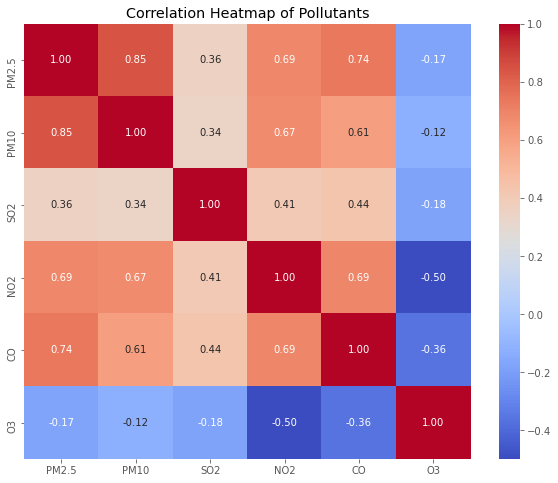

In [7]:
# Selecting the pollutant columns for correlation

pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Calculating the correlation matrix
corr_matrix = df[pollutant_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants')
plt.show()

The heatmap illustrates the correlations between different air pollutants. Notable observations include:
- PM2.5 and PM10: There is a strong positive correlation between PM2.5 and PM10. This is expected as they are both particulate matters, albeit of different sizes.
- Correlations with NO2 and CO: Both PM2.5 and PM10 show significant positive correlations with NO2 and CO, suggesting common sources such as vehicle emissions or industrial activities.


In [8]:
# Drop unnecessary columns
df = df.drop(['NO2'], axis=1)

## Data Exploration/Visualization

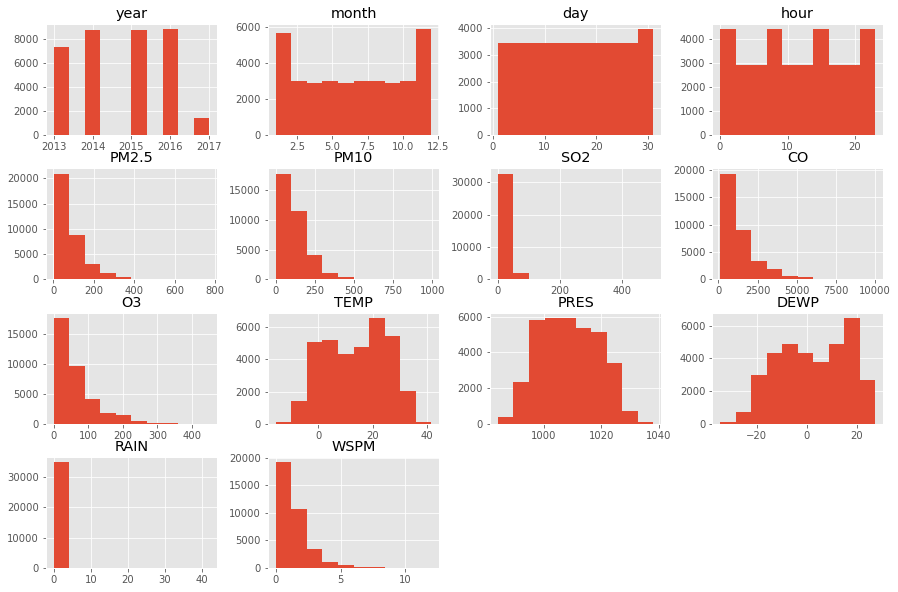

In [9]:
#histogram for numerical columns
df.hist(figsize=(15,10))
plt.show()

## Summary on the columns observed 

Consideration of various meteorological factors involved provides a comprehensive understanding of the interplay between weather and air quality. This summary highlights the importance of considering multiple factors when analyzing air quality data. Further in-depth analysis, including correlation studies and modeling, could uncover more nuanced relationships within the dataset and contribute to informed decision-making for environmental management.

- Analyzing **temperature** patterns helps identify seasons with potentially higher pollution levels. Understanding how air quality varies with the seasons is crucial for environmental planning. 

- Wind:
Higher wind speeds contribute to better air quality by dispersing pollutants. Periods of low wind speed may lead to the accumulation of pollutants, impacting air quality negatively. 

- Atmospheric Conditions:
Monitoring air pressure and humidity alongside pollution levels provides a holistic view of atmospheric conditions. Changes in these parameters can be correlated with variations in air quality. PM2.5 Spikes:

- Examining spikes in PM2.5 concentrations helps identify potential pollution events. Investigating the causes of these spikes can guide pollution control strategies. Holistic Approach:



In [10]:
#Investigating only time and the column PM2.5

df1 = pd.to_datetime(df[["year", "month", "day", "hour"]])
data = pd.concat([df1, df['PM2.5']], axis = 1)
data = data.rename(columns = {0: "Time", 'PM2.5': 'PM2.5'})
data.set_index('Time', inplace = True)
data.head()

,PM2.5
Time,
2013-03-01 00:00:00,6.0
2013-03-01 01:00:00,6.0
2013-03-01 02:00:00,5.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,5.0


In [11]:
#Check to see the number of missing values
data.isna().sum()

PM2.5    0
dtype: int64

In [12]:
data.describe()

,PM2.5
count,35064.000000
mean,84.345203
std,83.228885
min,2.000000
25%,24.000000
50%,60.000000
75%,116.000000
max,770.000000


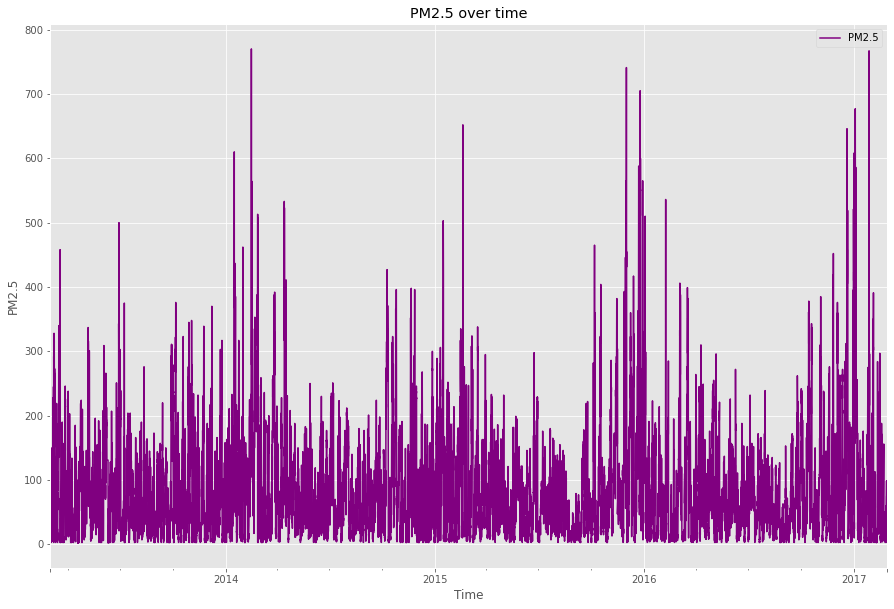

In [13]:
data.plot(figsize=(15,10), color = 'purple')
plt.ylabel('PM2.5')
plt.title('PM2.5 over time')
plt.show()

Let's explore the peaks in our dataset by examining the timestamps of the highest values:


In [14]:
data.sort_values(by = 'PM2.5', ascending = False).head(25)


,PM2.5
Time,
2014-02-14 22:00:00,770.0
2017-01-28 02:00:00,767.0
2015-12-01 13:00:00,741.0
2017-01-28 01:00:00,739.0
2015-12-01 12:00:00,733.0
2015-12-25 11:00:00,705.0
2015-12-25 12:00:00,705.0
2015-12-25 13:00:00,680.0
2017-01-04 00:00:00,677.0


**Conclusion**: Majority of highest values recorded occur during the months of December to February. Could this speculate high pollution during Winter?

## Temporal Analysis

To find any probabilty of a trend/seasonality, lets break down the data by plotting and tracing any patterns over time.

### Resample to average daily data 

In [15]:
# resample the data at a daily frequency ('D' stands for 'Day')
dataH = data.resample('D').mean()

In [16]:
def index_scale(plotnumber, data):
    """Plot Index Scale.
    
    Takes in a dataset to graph the PM2.5 scale on graph for comparison.
    
    Args:
        plotnumber: Corresponding plot number in the subplots of the graph.
        data: A dataframe of the the time window we want to graph.
    
    Returns: 
        A subplot of the data along with the PM2.5 scale on the graph for comparison.
    """
    axs[plotnumber].fill_between(x = data, y1 = 0, y2 = 12, alpha = 0.9, label = 'Good', color = 'g')
    axs[plotnumber].fill_between(x = data, y1 = 12.1, y2 = 35.4, label = 'Moderate', color = 'y')
    axs[plotnumber].fill_between(x = data, y1 = 35.5, y2 = 55.4, label = 'Unhealthy For Sensitive Group', color = 'orange')
    axs[plotnumber].fill_between(x = data, y1 = 55.5, y2 = 150.4, alpha = 0.7, label = 'Unhealthy', color = 'r')
    axs[plotnumber].fill_between(x = data, y1 = 150.5, y2 = 250.4, alpha = 0.7, label = 'Very Unhealthy', color = 'darkred')
    axs[plotnumber].fill_between(x = data, y1 = 250.5, y2 = 500.4, alpha = 0.4, label = 'Hazardous', color = 'black')
    axs[plotnumber].legend(loc = 'upper left', framealpha = 0.5)
    axs[plotnumber].set_xlabel('Year ' + data[0].strftime('%Y') + ' - Year ' + data[-1].strftime('%Y'))
    axs[plotnumber].set_ylabel('PM2.5 Index')

Then , we a set of subplots to visualize the PM2.5 index data over a span of four years, each year being represented in a separate subplot.

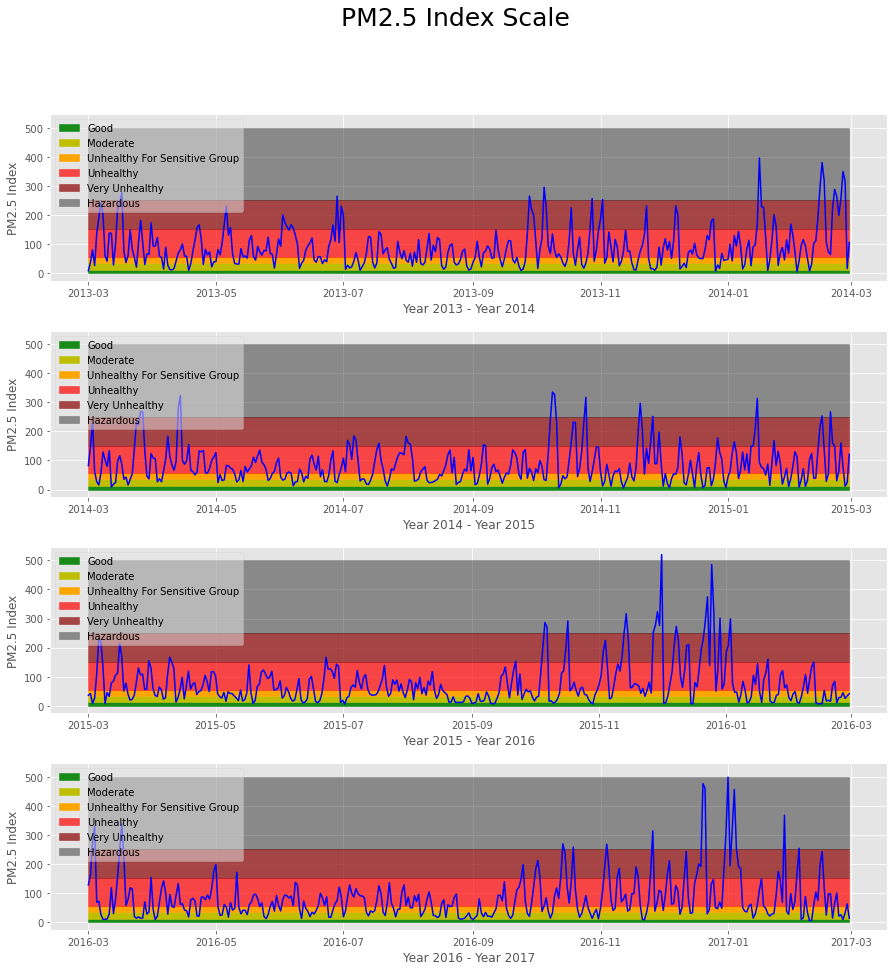

In [17]:
fig, axs = plt.subplots(4, sharey = True, figsize = (15, 15))
fig.suptitle('PM2.5 Index Scale', fontsize = 25)
fig.subplots_adjust(hspace = 0.3)
axs[0].plot(dataH['2013-03-01':'2014-02-28'], color = 'blue')# Plotting the data for the first set of years
axs[1].plot(dataH['2014-03-01':'2015-02-28'], color = 'blue')
axs[2].plot(dataH['2015-03-01':'2016-02-29'], color = 'blue')
axs[3].plot(dataH['2016-03-01':'2017-02-28'], color = 'blue')

xdate0 = pd.date_range(start = "2013-03-01", end= "2014-02-28")
xdate1 = pd.date_range(start = '2014-03-01', end = '2015-02-28')
xdate2 = pd.date_range(start = '2015-03-01', end = '2016-02-29')
xdate3 = pd.date_range(start = '2016-03-01', end = '2017-02-28')

index_scale(0, xdate0)
index_scale(1, xdate1)
index_scale(2, xdate2)
index_scale(3, xdate3)


This visualization is useful for analyzing and presenting air quality trends over time, emphasizing the severity and duration of different pollution levels. <br>

The areas are filled with different colors and labels to represent varying air quality categories, each defined by specific PM2.5 index ranges: 
- 'Good' (green)
- 'Moderate' (yellow)
- 'Unhealthy For Sensitive Group' (orange)
- 'Unhealthy' (red)
- 'Very Unhealthy' (dark red)
- 'Hazardous' (Grey)

### Noticeable Trends

Lets visualize data points where the PM2.5 levels exceed 250 , indicating potentially dangerous air quality conditions.

Additionally, the code highlights specific time periods in each year (from December to the end of February) the winter months  associated with higher pollution levels. This visualization thus serves to emphasize the occurrences of extremely high PM2.5 levels, especially during these colder months.

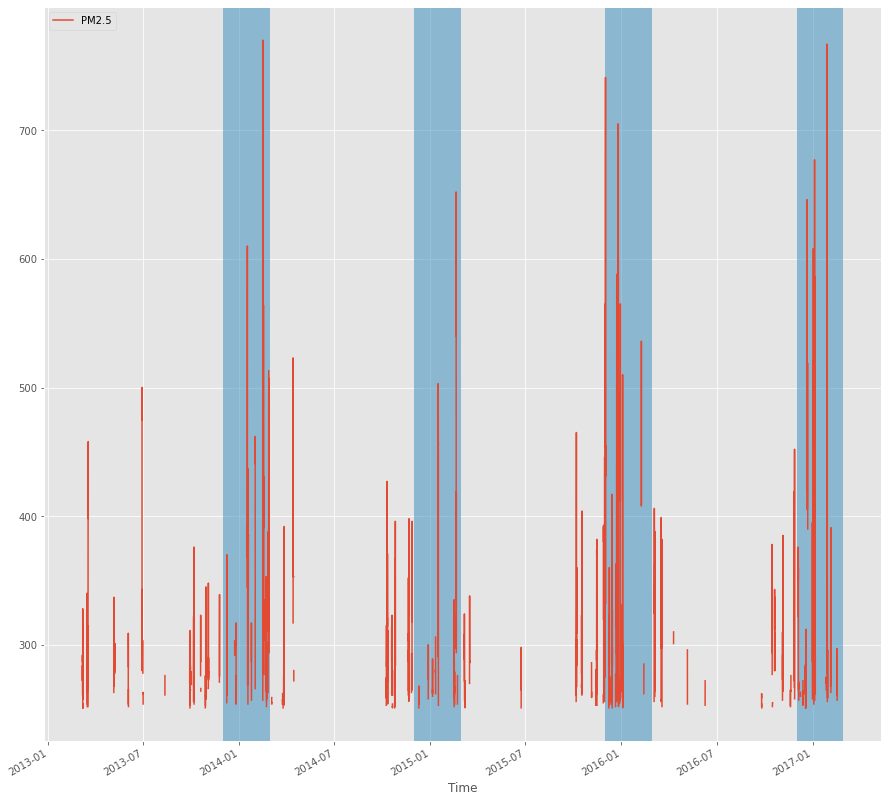

In [18]:
datadanger = data[data>250].sort_values(by = 'PM2.5', ascending = False)
datadanger.plot(figsize = (15, 15))
plt.axvspan(xmin = '2013-12-01', xmax = '2014-02-28', alpha = 0.5)
plt.axvspan(xmin = '2014-12-01', xmax = '2015-02-28', alpha = 0.5)
plt.axvspan(xmin = '2015-12-01', xmax = '2016-02-28', alpha = 0.5)
plt.axvspan(xmin = '2016-12-01', xmax = '2017-02-28', alpha = 0.5)

Notice the high PM2.5 values during the winter months of December, January, and February. This is due to the fact that the winter months are the coldest months in Gucheng area and the heating systems are turned on. The heating systems are powered by coal which is a major contributor to the high PM2.5 values.

In [19]:
df2 = pd.to_datetime(df[["year", "month", "day", "hour"]])
datad = pd.concat([df2, df[['PM2.5', 'TEMP']]], axis = 1)
datad = datad.rename(columns = {0: "Time", 'PM2.5': 'PM2.5', 'TEMP': 'TEMPERATURE'})
datad.set_index('Time', inplace = True)
datad.head()

,PM2.5,TEMPERATURE
Time,,
2013-03-01 00:00:00,6.0,0.1
2013-03-01 01:00:00,6.0,-0.3
2013-03-01 02:00:00,5.0,-0.7
2013-03-01 03:00:00,6.0,-1.0
2013-03-01 04:00:00,5.0,-1.3


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Temperature')]

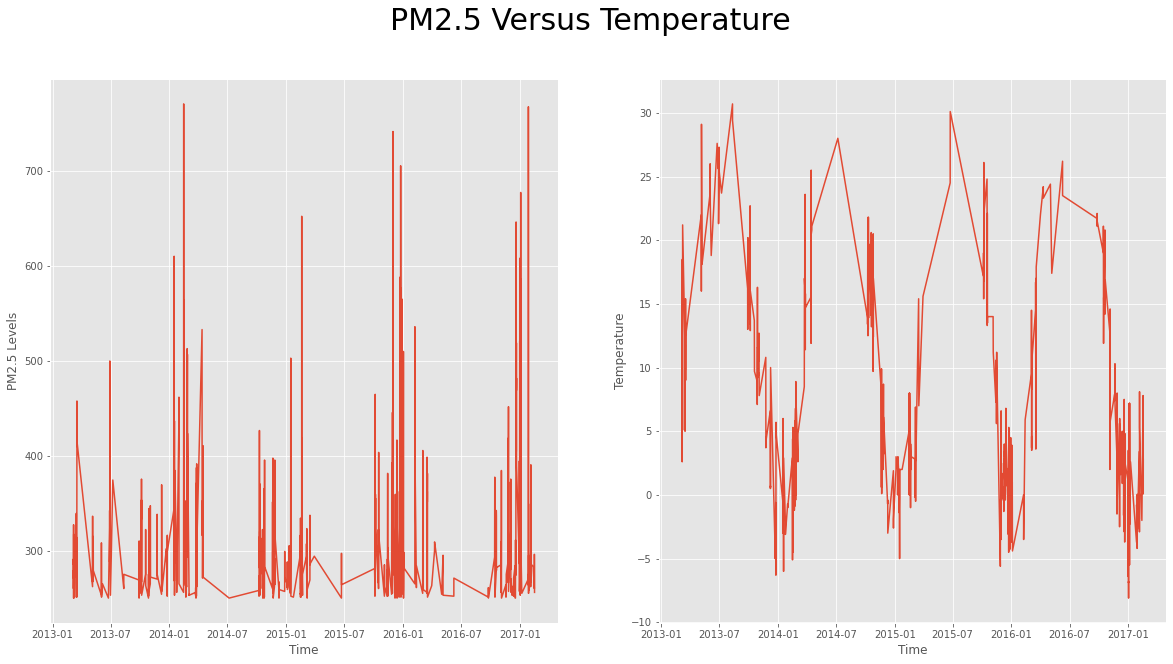

In [20]:
fig, axs = plt.subplots(1, 2, sharex = True, figsize = (20, 10))
fig.suptitle('PM2.5 Versus Temperature', size = 30)
axs[0].plot(datad[datad['PM2.5']>250]['PM2.5'])
axs[0].set(xlabel = ('Time'), ylabel = ('PM2.5 Levels'))
axs[1].plot(datad[datad['PM2.5']>250]['TEMPERATURE'])
axs[1].set(xlabel = ('Time'), ylabel = ('Temperature'))

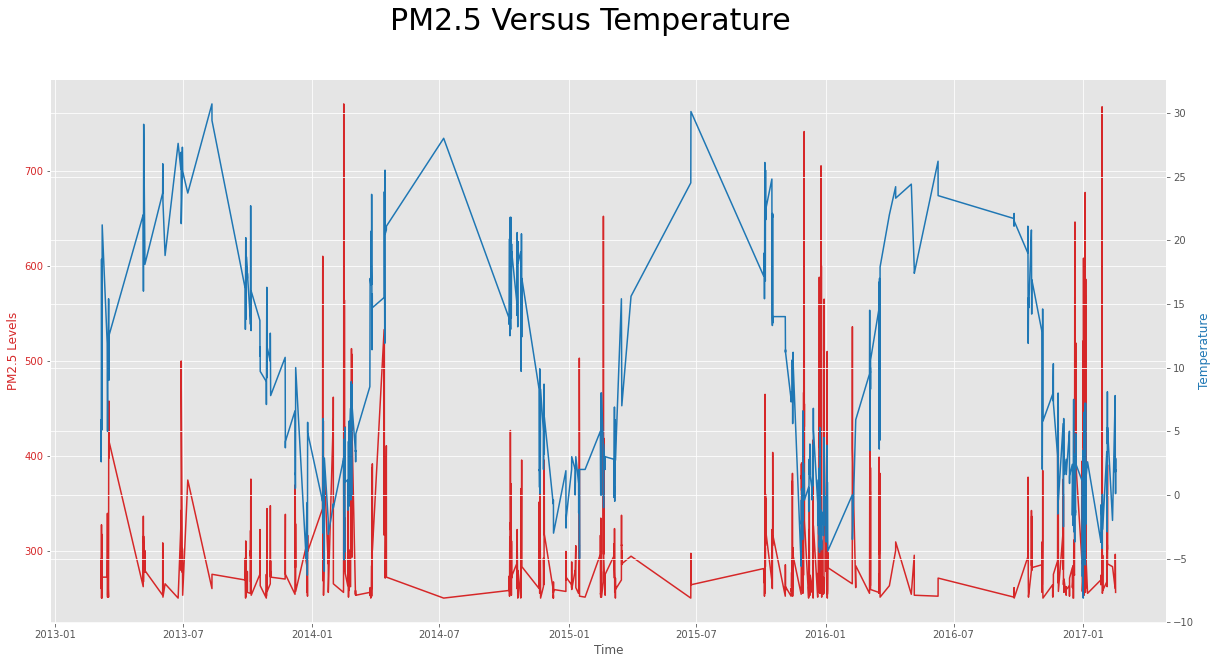

In [21]:
fig, ax1 = plt.subplots(figsize=(20, 10))
fig.suptitle('PM2.5 Versus Temperature', size=30)

# Plot PM2.5 on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('PM2.5 Levels', color=color)
ax1.plot(datad[datad['PM2.5'] > 250]['PM2.5'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for temperature
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(datad[datad['PM2.5'] > 250]['TEMPERATURE'], color=color)

As temperature rises, the PM2.5 levels drops and vice versa. During winter, PM2.5 levels increase due to higher levels of emmisions. 

## Reasons for high PM2.5 emmision 

We can suggest that PM2.5 levels are likely to be elevated during daytime compared to nighttime. The reasoning behind this assumption is the increased vehicular activity during the day as people commute to work. To explore this hypothesis, we plan to examine PM2.5 values over 24-hour cycles on various randomly selected dates, aiming to identify any distinct trends in air pollution associated with daily activities.

<AxesSubplot:xlabel='Time'>

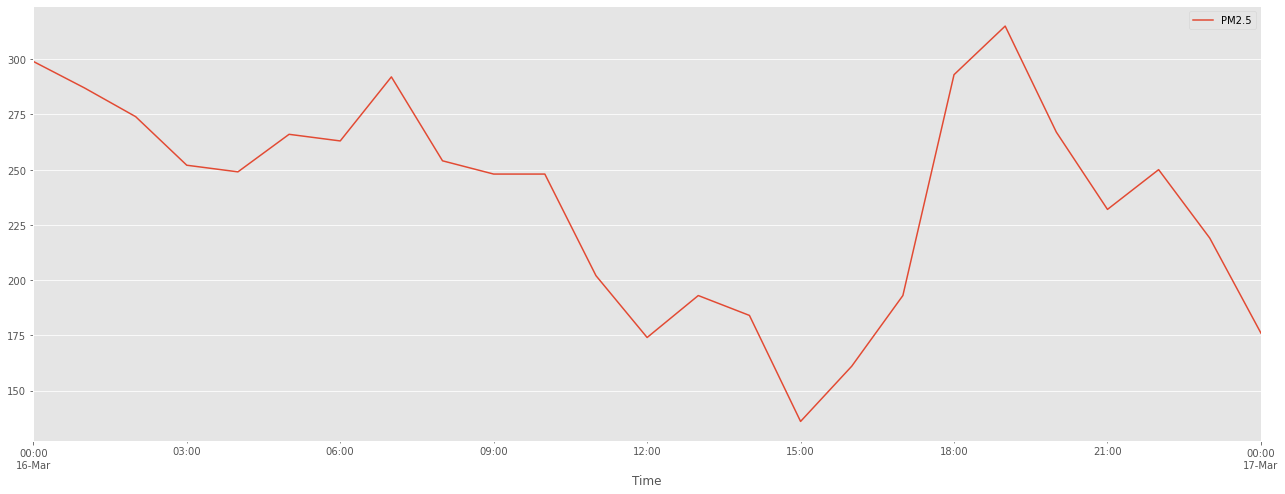

In [22]:
#plot random day values: Date 2013-03-16 to 2013-03-17
day1 = data.loc['2013-03-16 00:00:00':'2013-03-17 00:00:00']
day1.plot(figsize = (22,8))

<AxesSubplot:xlabel='Time'>

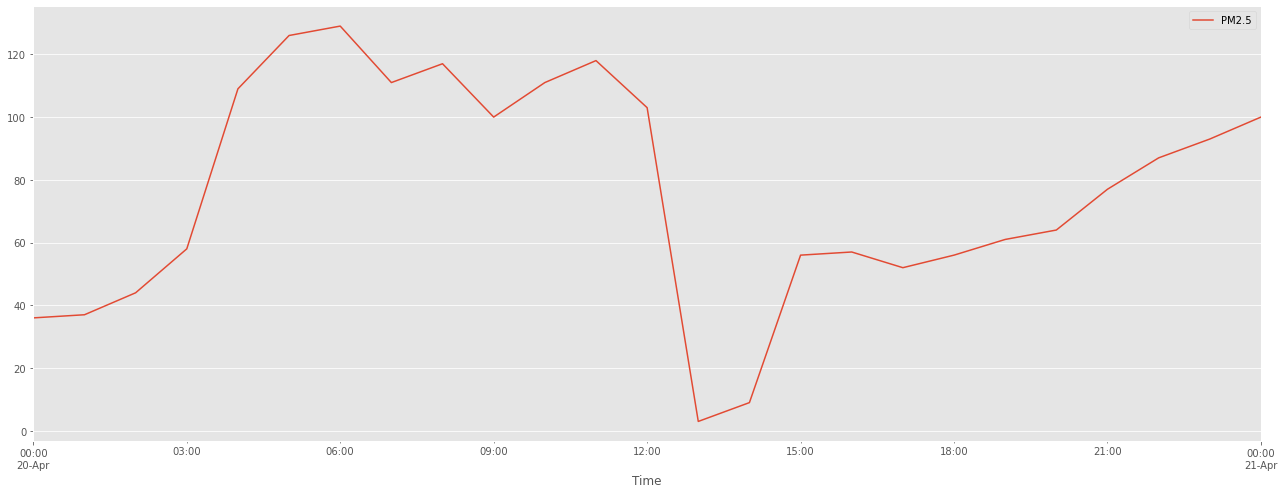

In [23]:
#plot random day values: Date 2013-04-20 to 2013-04-21
day1 = data.loc['2013-04-20 00:00:00':'2013-04-21 00:00:00']
day1.plot(figsize = (22,8))

We graphed random days to see if there is any pattern in the data but we could not find any pattern. From morning  to night there is no noticable pattern in the data. Although these two random dates move inversely from each other, we can still take a look at the average of all the data for each hour. Perhaps this graph can share some information that we can not see in the two graphs above. <br>

So we do an hourly analysis:

## Hourly Analysis of Pollution trends

`trendexp` is a comprehensive function for analyzing trends in time series data.<br>
 It combines rolling statistics, decomposition, and the Dickey-Fuller test to provide a deep understanding of the data's characteristics. This is essential for further modeling and forecasting tasks in time series analysis.

**Rolling Statistics**: It calculates and plots the rolling mean and standard deviation of the data with a specified window size n. This step is crucial for visualizing moving trends and volatility in the time series data. The rolling mean smoothens out short-term fluctuations and highlights longer-term trends or cycles, while the rolling standard deviation shows the variability of the data over time.

**Time Series Decomposition**: The function then employs time series decomposition to separate the data into trend, seasonal, and residual components. This decomposition is visualized in a series of plots, providing a clear picture of the underlying patterns in the data, such as trends, seasonality, and irregularities.

**Dickey-Fuller Test**: Finally, the function performs the Dickey-Fuller test, a statistical test used to check for the presence of unit roots in a time series and hence test for stationarity. The results, including the test statistic, p-value, number of lags used, and critical values, are displayed. This test is critical in determining whether the time series is stationary, which is an assumption in many time series models.

In [24]:
def trendexp(data, n, title):
    """Trend exploration of data.
    
    Takes in a dataset to create a rolling mean plot, time series decomposition 
    and perform a Dickey-Fuller test.
    
    Args:
        data: A dataframe of the data set you want to explore.
        n: size of the moving window. The number of observations used for calculating the statistic.
        title: Title of your plots
    
    Returns: 
        A plot of the rolling mean, time series decomposition of the specified
        data set and the results of the Dickey-Fuller test on our data set.
    """
    
    print(title)
    #Performing rolling mean on the data with a window size of n
    roll_mean = data.rolling(window=n, center=False).mean()
    roll_std = data.rolling(window=n, center=False).std()

    fig = plt.figure(figsize=(12,6))
    plt.plot(data, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    print('-----------------------------------------------------------------')
    #Time Series Decomposition
    print('Time Series Decomposition: \n')
    decomposition = seasonal_decompose(data)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(data, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print('-----------------------------------------------------------------')
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: \n')
    dftest = adfuller(data['PM2.5'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

We plot values for 30Days to figure out any patterns. so , 30 days translates to 720hrs(24 * 30).

Hourly Data


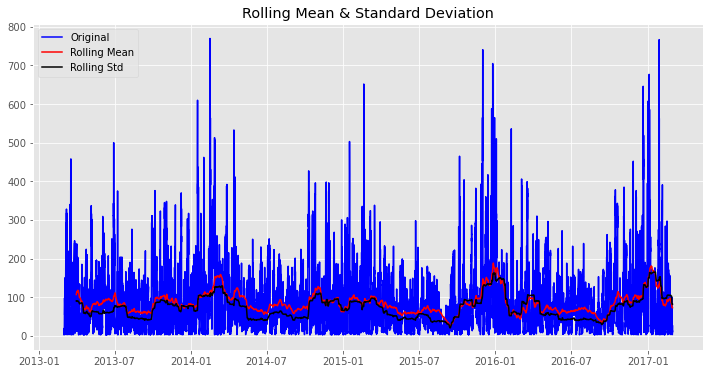

-----------------------------------------------------------------
Time Series Decomposition: 



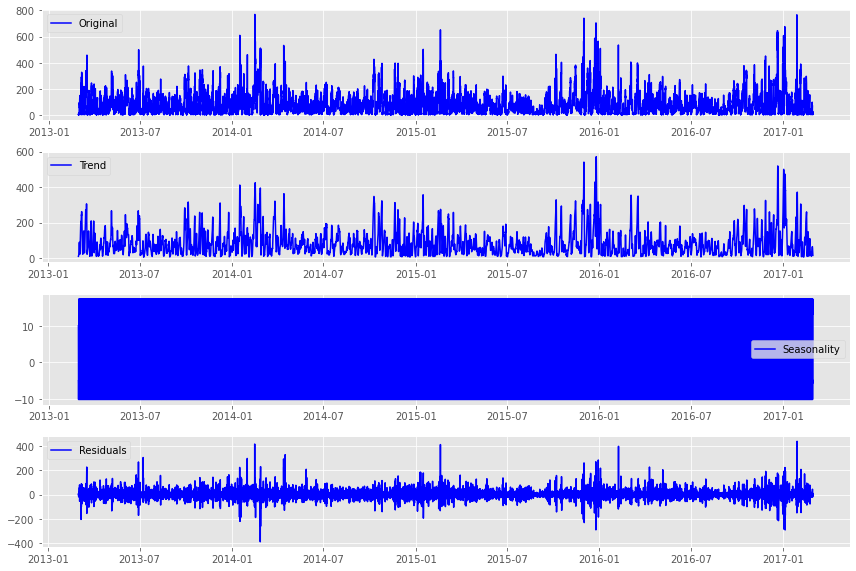

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                   -18.847174
p-value                            0.000000
#Lags Used                        51.000000
Number of Observations Used    35012.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64


In [25]:
#plotting the trend of the data for 30 Days.
trendexp(data, 720, 'Hourly Data')

From the Dickey-Fuller test, the obtained p-value is 0.000000, leading to the inference that the time series exhibits stationarity. This suggests an extensive volume of available data. Consequently, a more granular analysis will be conducted, focusing on daily periods and weekly PM2.5 levels within the time series.

So let's break data into bits by starting with a daily analysis

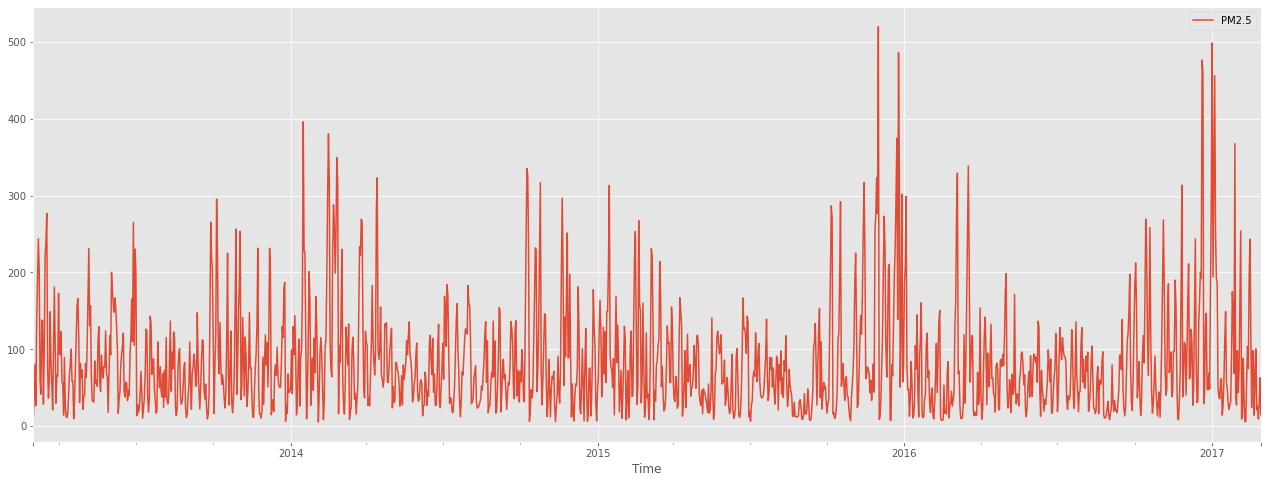

In [26]:
#Daily Mean Data Points
dailydata = data.resample('D').mean()
dailydata.plot(figsize = (22,8))
plt.show()

Daily Data


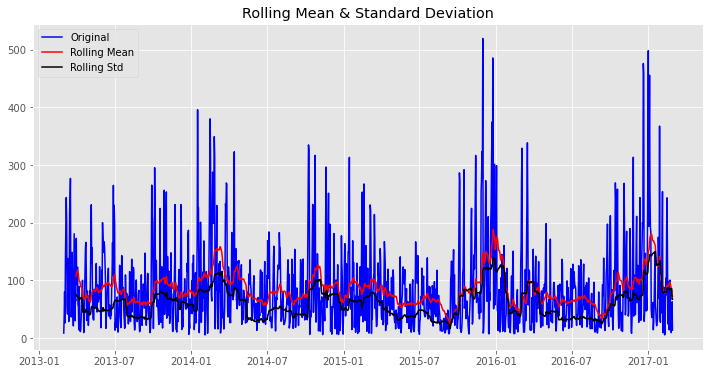

-----------------------------------------------------------------
Time Series Decomposition: 



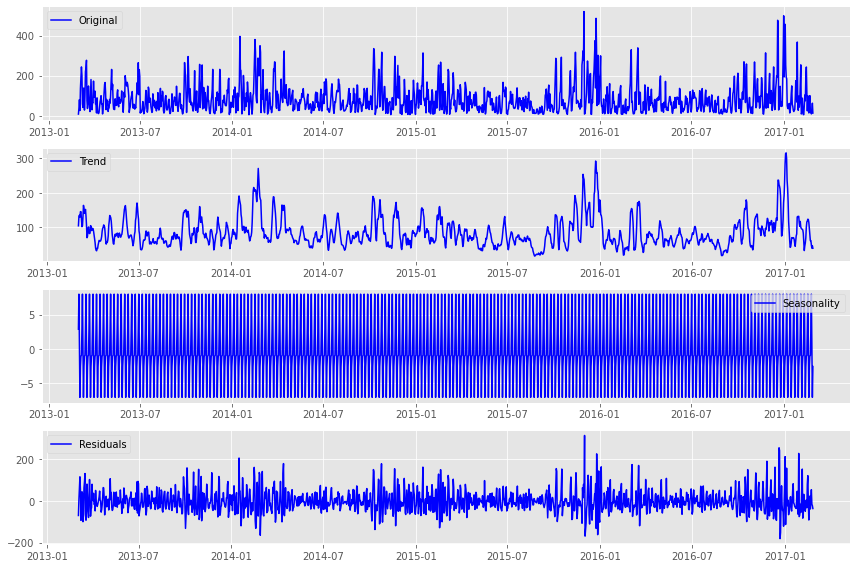

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                -1.697466e+01
p-value                        9.105084e-30
#Lags Used                     2.000000e+00
Number of Observations Used    1.458000e+03
Critical Value (1%)           -3.434843e+00
Critical Value (5%)           -2.863524e+00
Critical Value (10%)          -2.567826e+00
dtype: float64


In [27]:
trendexp(dailydata, 30, 'Daily Data')

Upon computing the daily mean for each 24-hour period, we subjected the data to a Dickey-Fuller Test. The resulting p-value is remarkably low, leading to the deduction that our dataset demonstrates stationarity.

### Analysing Daily Maximum PM2.5 Values

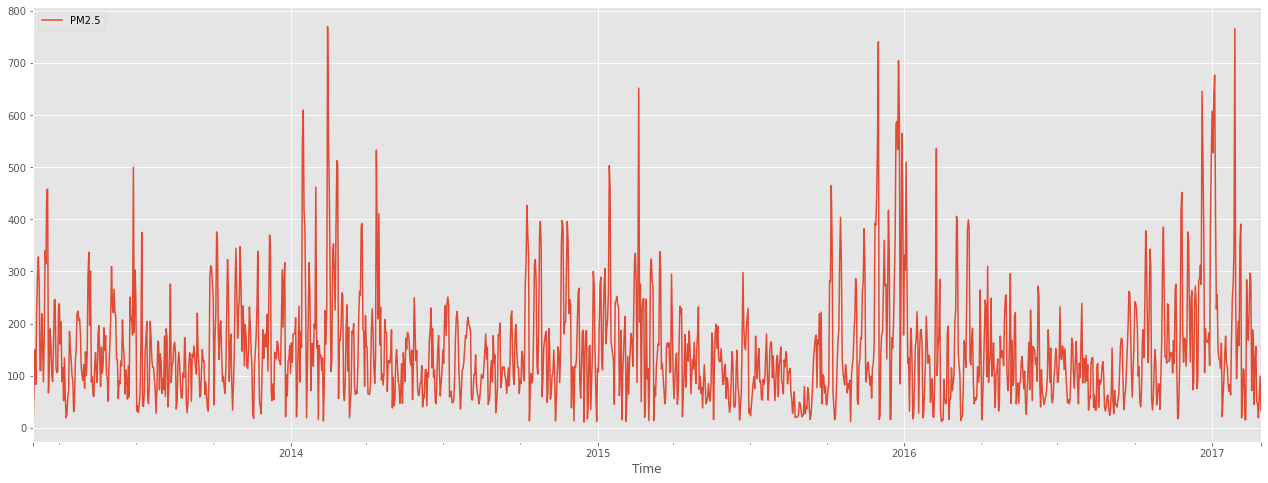

In [28]:
#Daily Max Data Points
dailymaxdata = data.resample('D').max()
dailymaxdata.plot(figsize = (22,8))
plt.show()

Analyse trends for the whole month daily maximum data:

Daily Max Data


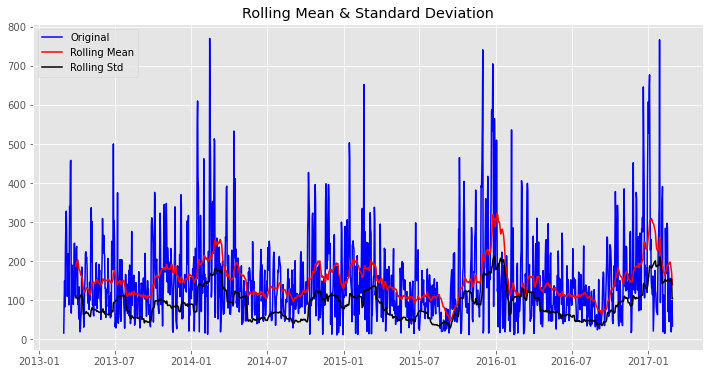

-----------------------------------------------------------------
Time Series Decomposition: 



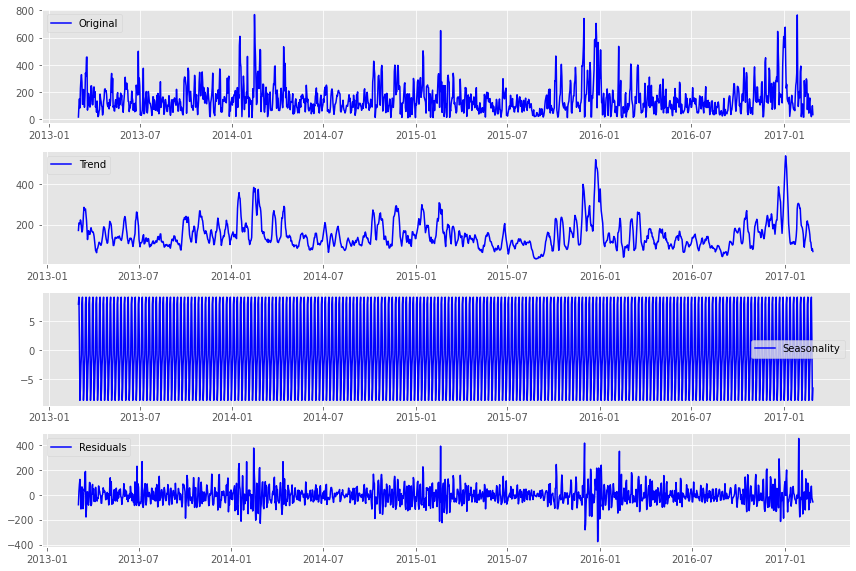

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                -9.240930e+00
p-value                        1.583355e-15
#Lags Used                     8.000000e+00
Number of Observations Used    1.452000e+03
Critical Value (1%)           -3.434862e+00
Critical Value (5%)           -2.863533e+00
Critical Value (10%)          -2.567831e+00
dtype: float64


In [29]:
#30 days
trendexp(dailymaxdata, 30, 'Daily Max Data')

The very small p-value and the comparison of the test statistic with critical values strongly suggest rejecting the null hypothesis. Therefore, the data is still stationary.

**Original Time Series**: The first plot shows the original data, which exhibits significant variability and some distinct spikes, indicating periods of high PM2.5 readings. There appears to be some seasonality, given the cyclical patterns in the data, and possibly an underlying trend, though this is not immediately clear due to the variability.

**Trend**: The second plot isolates the trend component from the time series data. We can observe periods of increase and decrease in PM2.5 levels. The trend component smooths out the noise and spikes of the original data, giving a clearer view of long-term movements in the data.

**Seasonality**: The third plot reveals the seasonal pattern within the data. The regular and periodic pattern indicates that the PM2.5 levels have a consistent seasonal cycle over the period examined. This could be due to various factors like weather changes, heating seasons, or agricultural activities.

**Residuals**: The fourth plot shows the residuals, which is the part of the original data not explained by the trend or seasonality. Ideally, if the model has captured all the systematic information in the data, the residuals should look like white noise (no discernible patterns).

**Dickey-Fuller Test**: The Dickey-Fuller test results indicate whether the time series is stationary. A p-value less than 0.05 usually suggests that the time series does not have a unit root, meaning it is stationary. In this case, the very low p-value (1.85335e-15) strongly suggests that the time series is stationary after removing the trend and seasonal components.

## Weekly Air Pollution Trends Analysis

After investigating daily trends, we didn't find any trends. Next we will investigate if there are any weekly trends

We begin by finding the mean of each week's data:

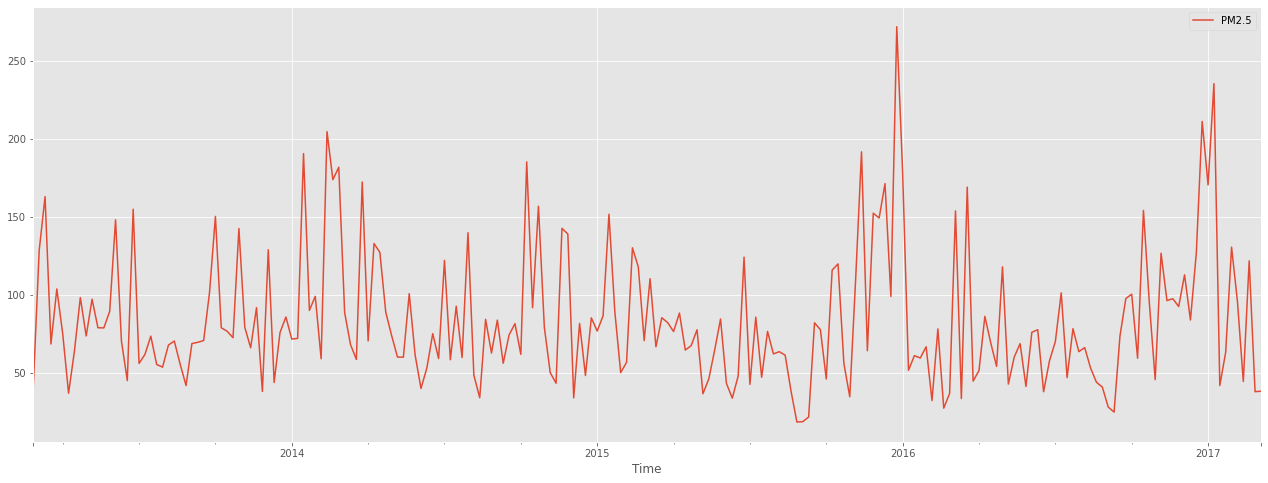

In [30]:
weeklymeandata = data.resample('W').mean()
weeklymeandata.plot(figsize = (22,8))
plt.show()

Run an analysis using `trendexp` function:

Weekly Mean Data


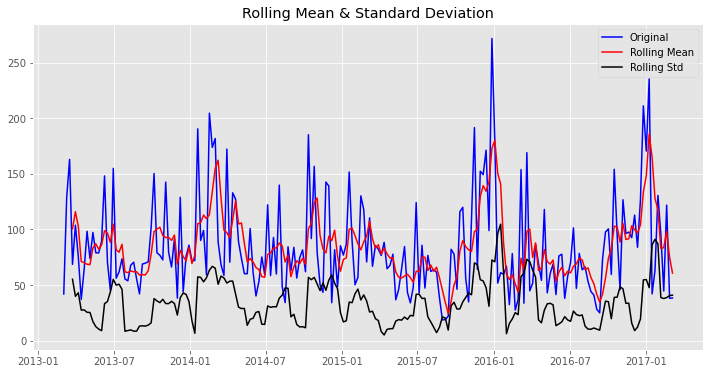

-----------------------------------------------------------------
Time Series Decomposition: 



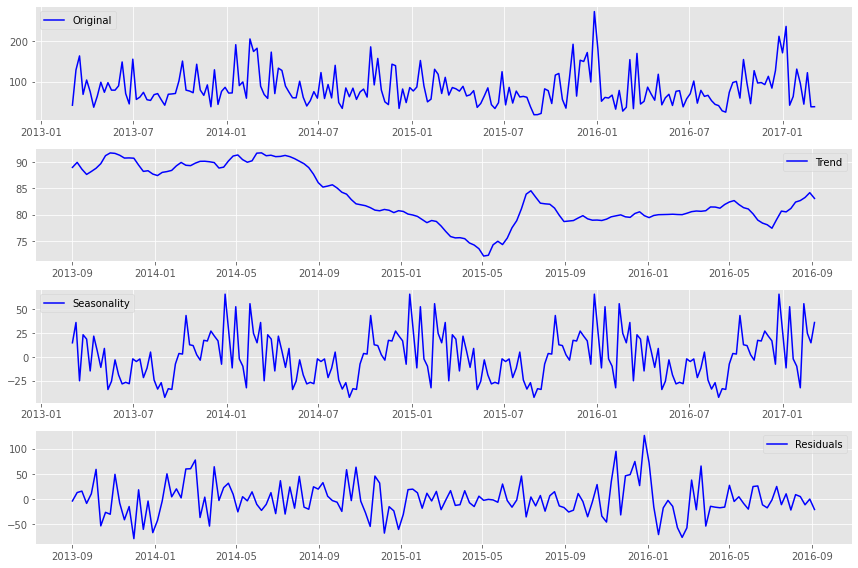

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                  -5.073793
p-value                          0.000016
#Lags Used                       3.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


In [31]:
trendexp(weeklymeandata, 4, 'Weekly Mean Data')

The weekly mean data analysis suggests that while the PM2.5 levels show variability, they do have a stable trend and clear seasonality. The residuals do not show any additional patterns, indicating that the trend and seasonality components capture most of the systematic information in the data. The stationarity of the series as per the Dickey-Fuller test indicates the suitability of the data for further time series modeling and forecasting.

## Weekly Max Values analysis

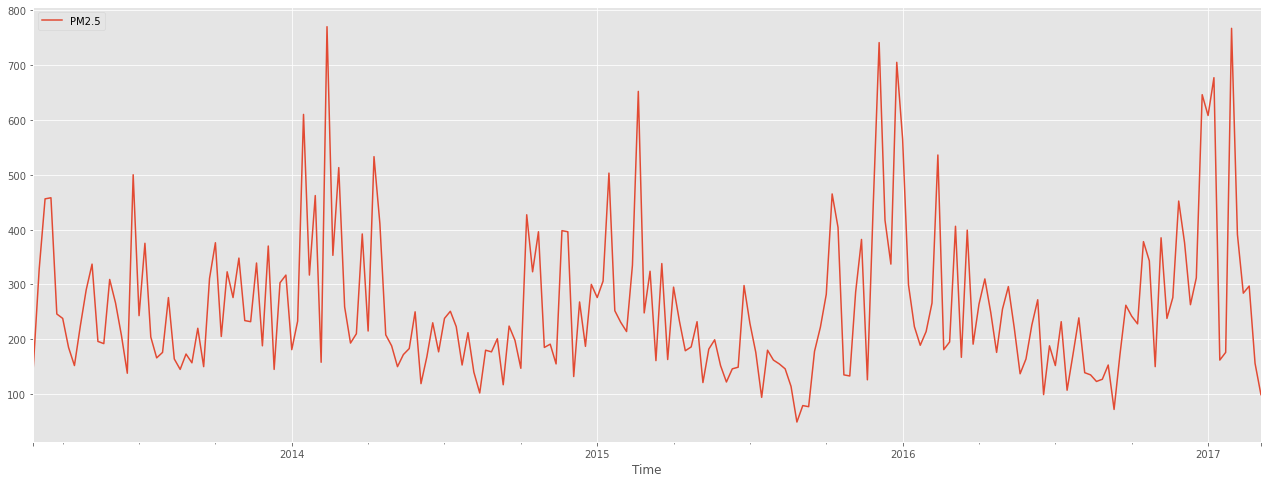

In [32]:
wmaxdata = data.resample('W').max()
wmaxdata.plot(figsize = (22,8))
plt.show()

Weekly Max Data


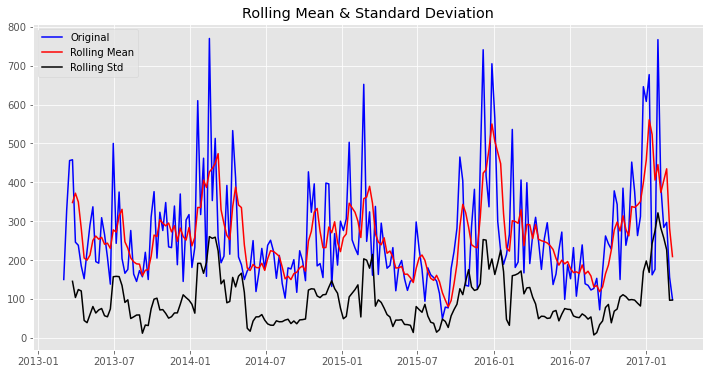

-----------------------------------------------------------------
Time Series Decomposition: 



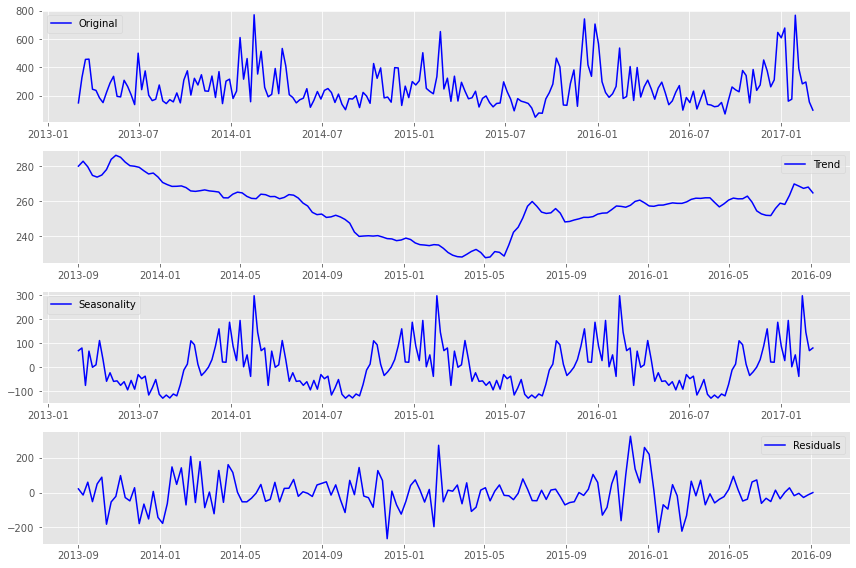

-----------------------------------------------------------------
Results of Dickey-Fuller Test: 

Test Statistic                  -4.567230
p-value                          0.000148
#Lags Used                       3.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


In [33]:
trendexp(wmaxdata, 4, 'Weekly Max Data')

**Conclusions**
- The rolling mean and standard deviation suggest that PM2.5 levels are not constant over time and exhibit some volatility.

- The decomposition analysis reveals that there is a trend component in the PM2.5 levels, which means the data is not strictly stationary. The seasonal component indicates a recurring pattern, which could be related to seasonal activities or natural phenomena affecting air quality.
- The Dickey-Fuller test results suggest that the time series is stationary after removing the trend, which means that the PM2.5 levels fluctuate around a stable mean and variance over time.
- For forecasting models, it's critical to account for both the trend and seasonality components identified in the time series decomposition. The stationary nature of the time series, indicated by the Dickey-Fuller test, means that models like ARIMA could be well-suited for forecasting these PM2.5 levels.

## Modeling

For modeling we will be using the weekly data because here is when we saw slight seasonality that we would like to explore on. Our weekly data set contains 210 data points, we will be breaking up our data into 80-20. That translates to: 
- 168 data points for training and 42 data points for testing.

In [34]:
#train test split
splitw = 168 # first 168 data points are for training


#Training Data
time_trainw = weeklymeandata[:splitw].index.values
y_trainw = weeklymeandata[:splitw].values

#Testing Data
time_testw = weeklymeandata[splitw:].index.values
y_testw = weeklymeandata[splitw:].values

In [35]:
#Reshaping time data for modeling
time_trainw = time_trainw.reshape(-1, 1)
time_testw = time_testw.reshape(-1, 1)

## SARIMA Model


**Parameter selection**

We define a set of ranges(p,d,q) to generate all possible combinations of these parameters for both the non-seasonal and seasonal elements of the model, with the seasonal combinations including a fixed seasonal period of 52, typically indicative of a yearly cycle when dealing with weekly data.

In [36]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]


Then performing a grid search to identify the best SARIMA model for forecasting PM2.5 air pollution levels. We iterate over all possible combinations of the non-seasonal (p, d, q) and seasonal (P, D, Q, s) parameters that were previously generated above. 

In [37]:
# GRID Search -- Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(weeklymeandata,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

After this grid search,we'll have a list of SARIMA configurations and their corresponding AIC value(Akaike Information Criterion) .
*AIC is a measure of the quality of each model, where a lower AIC value indicates a better model fit to the data*.<br>
Then this list is analyzed to find the model with the lowest AIC value, which is considered the best model among those evaluated. 

In [38]:
print(ans)

[[(0, 0, 0), (0, 0, 0, 52), 2497.536209390582], [(0, 0, 0), (0, 0, 1, 52), 1807.6118910189784], [(0, 0, 0), (0, 1, 0, 52), 1704.126317088418], [(0, 0, 0), (0, 1, 1, 52), 3705.111107099284], [(0, 0, 0), (1, 0, 0, 52), 1706.6729659569232], [(0, 0, 0), (1, 0, 1, 52), 1682.7137417309123], [(0, 0, 0), (1, 1, 0, 52), 1142.5008113145295], [(0, 0, 0), (1, 1, 1, 52), 1131.1898635392874], [(0, 0, 1), (0, 0, 0, 52), 2377.617119531457], [(0, 0, 1), (0, 0, 1, 52), 1743.8204423257384], [(0, 0, 1), (0, 1, 0, 52), 1695.6243534402663], [(0, 0, 1), (0, 1, 1, 52), 5135.7658577637285], [(0, 0, 1), (1, 0, 0, 52), 1707.340870608546], [(0, 0, 1), (1, 0, 1, 52), 1673.9620203152076], [(0, 0, 1), (1, 1, 0, 52), 1143.5918463921992], [(0, 0, 1), (1, 1, 1, 52), 1124.5909637403229], [(0, 1, 0), (0, 0, 0, 52), 2255.373071241792], [(0, 1, 0), (0, 0, 1, 52), 1696.4640505579123], [(0, 1, 0), (0, 1, 0, 52), 1795.3810241634624], [(0, 1, 0), (0, 1, 1, 52), 3103.1291605269134], [(0, 1, 0), (1, 0, 0, 52), 1709.7558411681848

Identifying the most optimal set of parameters for the SARIMA model based on the AIC value :

In [39]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 52)
aic           1115.64
Name: 63, dtype: object

In [40]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(weeklymeandata, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 52), 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0440      0.071      0.623      0.534      -0.094       0.182
ma.L1         -1.0000     94.663     -0.011      0.992    -186.535     184.535
ar.S.L52       0.2927      0.155      1.889      0.059      -0.011       0.596
ma.S.L52      -1.0000     94.658     -0.011      0.992    -186.526     184.526
sigma2      1985.0492      0.048   4.17e+04      0.000    1984.956    1985.142


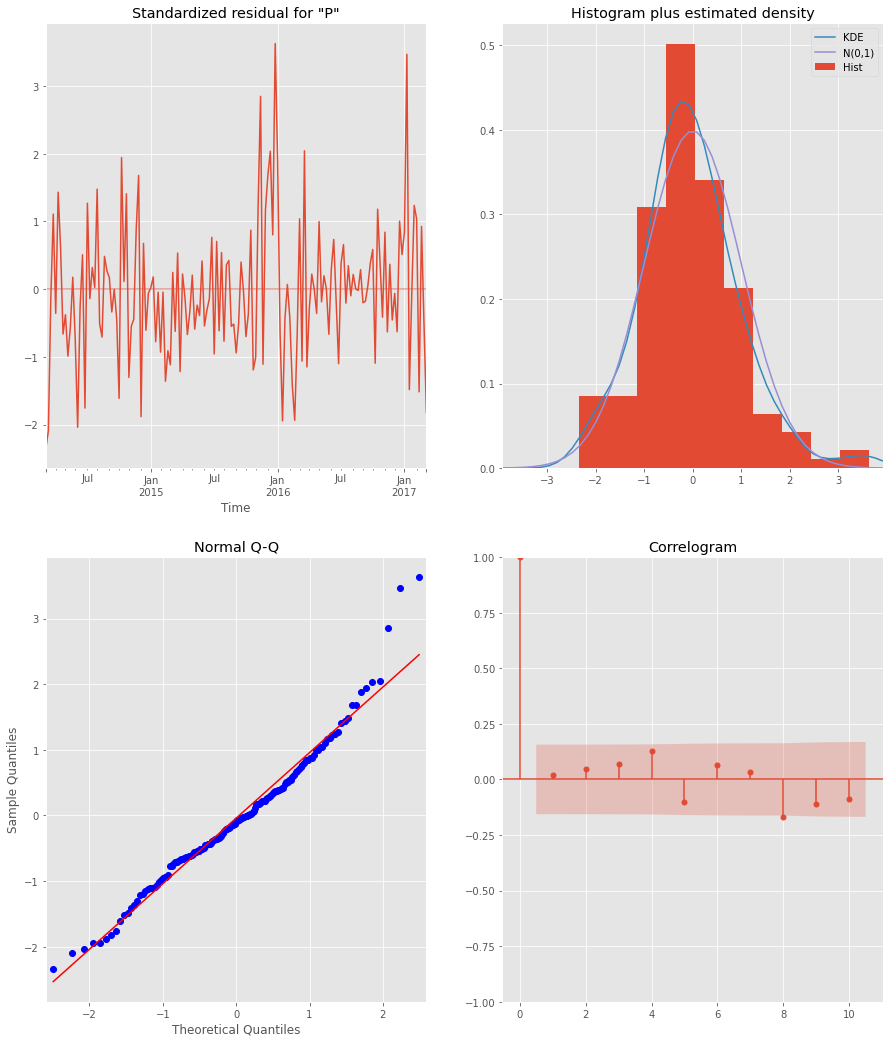

In [41]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()


### Validating the model

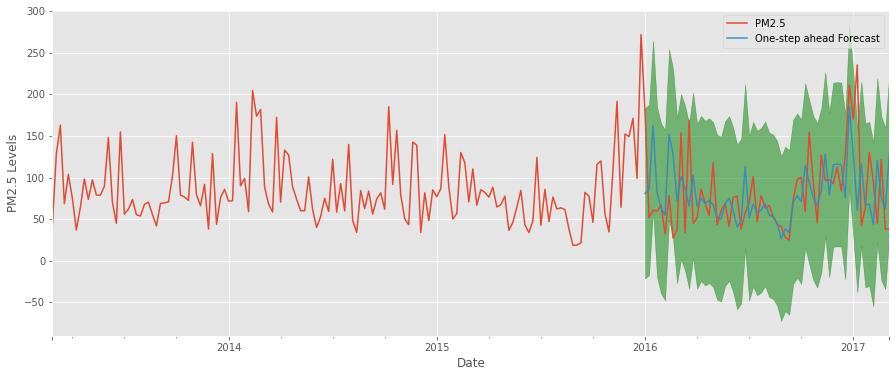

In [42]:
# Get predictions starting from 01-03-2016 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-03'), dynamic=False)
pred_conf = pred.conf_int()
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = weeklymeandata['2013-03-03':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5 Levels')
plt.legend()

plt.show()

In [43]:
# Get the real and predicted values
PM_forecasted = pred.predicted_mean.values
PM_truth = weeklymeandata['2016-01-03':].values

# Compute the mean square error
msePM = ((PM_forecasted - PM_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(msePM, 2)))
rmsePM = np.sqrt(msePM)
rmsePM

The Mean Squared Error of our forecasts is 3119.38


55.85139374742718

Root mean squared error is 56.66, which means that our model can predict PM2.5 values within 56.66 confidence interval.

### model 2

## Linear Regression

In [44]:
X_testw = pd.DataFrame(time_testw)

X_testw.columns = ["Date"]
X_testw['Date'] = pd.to_datetime(X_testw['Date'])
X_testw['Date']=X_testw['Date'].map(dt.datetime.toordinal)

In [45]:
regressor = LinearRegression()
regressor.fit(time_trainw, y_trainw)

LinearRegression()

In [46]:
y_test_predw = regressor.predict(X_testw)
errors_linearw = y_test_predw - y_testw

mselw = np.square(errors_linearw).mean()
rmselw = np.sqrt(mselw)
rmselw

113.70793479301253

Our root mean squared error is 113.71, which means that our model can predict PM2.5 values within 113.71 confidence interval. The linear regression model performed a lot worser than the Naive Forecasting Model. Below is a graph of our data and our predictions from the Linear Regression Model.

Text(0.5, 1.0, 'Linear Regression')

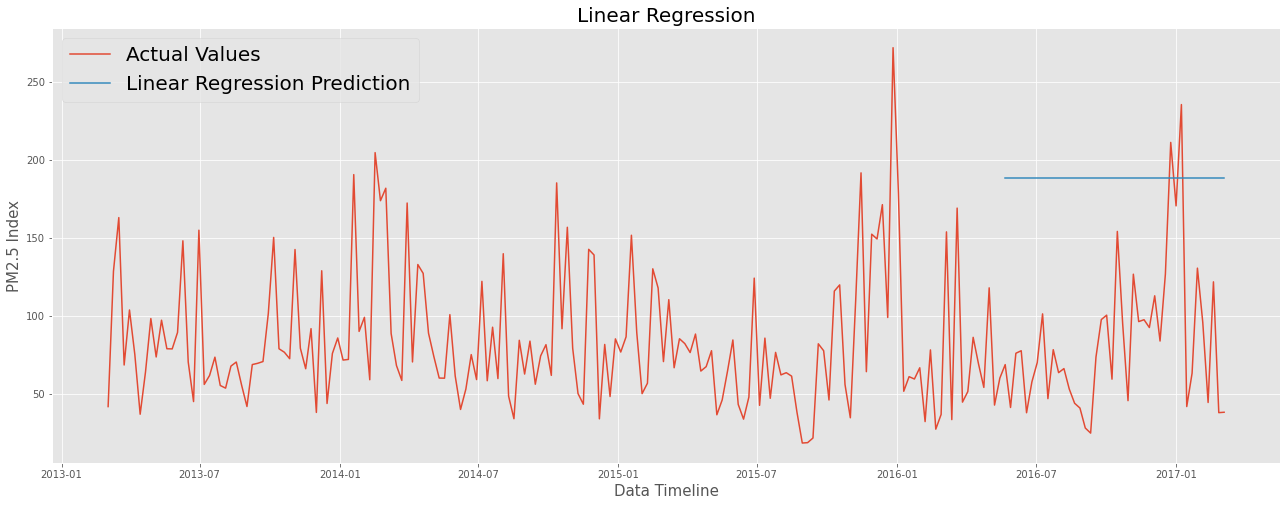

In [48]:
graphw = pd.DataFrame(list(zip(weeklymeandata[splitw:].index, y_test_predw)), columns = ['Time', 'Val'])
graphw.set_index('Time', inplace = True)
plt.figure(figsize = (22, 8))
plt.plot(weeklymeandata, label = 'Actual Values')
plt.plot(graphw, label = 'Linear Regression Prediction')
plt.legend(loc = 'upper left', fontsize = 20)
plt.xlabel('Data Timeline', fontsize = 15)
plt.ylabel('PM2.5 Index', fontsize = 15)
plt.title('Linear Regression', fontsize = 20)

In [52]:


# Assuming weeklymeandata and y_test_predw have the same length
mse = mean_squared_error(weeklymeandata, y_test_predw)
rmse = mean_squared_error(weeklymeandata, y_test_predw, squared=False)
mae = mean_absolute_error(weeklymeandata, y_test_predw)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


ValueError: Found input variables with inconsistent numbers of samples: [210, 42]

In [53]:
residuals = weeklymeandata - y_test_predw

plt.figure(figsize=(22, 8))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('Data Timeline', fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.title('Residuals Analysis', fontsize=20)
plt.show()


ValueError: Unable to coerce to DataFrame, shape must be (210, 1): given (42, 1)

## Recommendations

## Conclusions

## Limitations